In [1]:
##import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train_E1GspfA.csv')
test=pd.read_csv('test_6QvDdzb.csv')

In [3]:
data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
data.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [5]:
data.shape

(18247, 3)

3 features and 18247 observations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


There are no missing values in all 3 columns

In [7]:
data.describe(include=object)

,date
count,18247
unique,895
top,2021-02-28
freq,24


In [8]:
data.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


data avail from 2018 August to 2021 Feb

## Feature Engineering

In [9]:
##converting date variable to datetime object
data['date']=pd.to_datetime(data['date'])

def year(x):
    return x.year

In [10]:
##extracting datetime features from the date variable
data['year'] = data['date'].apply(lambda x:x.year)
data['month'] = data['date'].apply(lambda x:x.month)
data['isQuarterDate'] = data['date'].apply(lambda x:x.quarter)
data['day'] = data['date'].apply(lambda x:x.day)
data['dayOfWeek'] = data['date'].apply(lambda x:x.dayofweek)
data['Weekend'] = data['dayOfWeek'].apply(lambda x:1 if x>4 else 0)

##dropping the date feature since all the information is extracted
data.drop(['date'], axis=1, inplace = True)


In [11]:
##checking the dataset 
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,Weekend
0,9,91,2018,8,3,18,5,1
1,10,21,2018,8,3,18,5,1
2,13,23,2018,8,3,18,5,1
3,14,104,2018,8,3,18,5,1
4,15,81,2018,8,3,18,5,1


In [12]:
##defining a function to find the timing of the day
def timeOfDay(n):
    if n in range(1,4):
        return 'Late Night'
    elif n in range(4,7):
        return 'Early Morning'
    elif n in range(7,12):
        return 'Morning'
    elif n in range(12,15):
        return 'Afternoon'
    elif n in range(15,18):
        return 'Evening'
    elif n in range(18,25) or n == 0:
        return 'Night'
    
data['timeOfDay'] = data['hour'].apply(lambda x: timeOfDay(x))
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,Weekend,timeOfDay
0,9,91,2018,8,3,18,5,1,Morning
1,10,21,2018,8,3,18,5,1,Morning
2,13,23,2018,8,3,18,5,1,Afternoon
3,14,104,2018,8,3,18,5,1,Afternoon
4,15,81,2018,8,3,18,5,1,Evening


In [13]:
##defining a function to find the season
def monthToSeasons(x):
    if x in[3,4,5]:
        return 'Summer'
    elif x in [6,7,8]:
        return 'Monsoon'
    elif x in [9,10,11]:
        return 'Autumn'
    elif x in [12,1,2]:
        return 'Winter'
    
data['Season'] = data['month'].apply(monthToSeasons)

In [14]:
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,Weekend,timeOfDay,Season
0,9,91,2018,8,3,18,5,1,Morning,Monsoon
1,10,21,2018,8,3,18,5,1,Morning,Monsoon
2,13,23,2018,8,3,18,5,1,Afternoon,Monsoon
3,14,104,2018,8,3,18,5,1,Afternoon,Monsoon
4,15,81,2018,8,3,18,5,1,Evening,Monsoon


<AxesSubplot:xlabel='timeOfDay', ylabel='demand'>

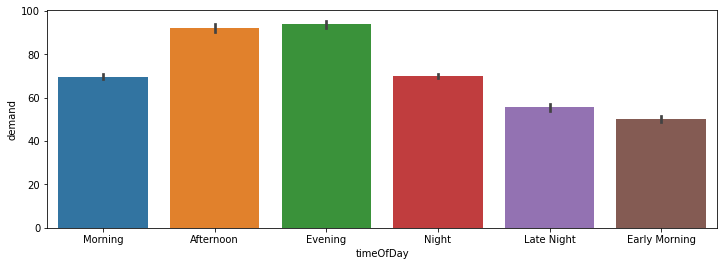

In [15]:
#Hour vs Demand

plt.figure(figsize=(12,4))
sns.barplot(x=data['timeOfDay'], y=data['demand'])

In [16]:
# replacing the categorical features with numerical values
data['timeOfDay'].replace({'Late Night': 4, 'Early Morning' : 5, 'Morning':3, 'Afternoon':1, 'Evening':0, 'Night':2}, 
                          inplace=True)


data['Season'].replace({'Summer':0,'Monsoon':1,'Autumn':2,'Winter':3},inplace=True)

In [17]:
data.head()

,hour,demand,year,month,isQuarterDate,day,dayOfWeek,Weekend,timeOfDay,Season
0,9,91,2018,8,3,18,5,1,3,1
1,10,21,2018,8,3,18,5,1,3,1
2,13,23,2018,8,3,18,5,1,1,1
3,14,104,2018,8,3,18,5,1,1,1
4,15,81,2018,8,3,18,5,1,0,1


# Handling of cyclical data

The following features are cyclical in nature.
'hour' and 'month'.
Sine and cosine transformations are done on the cyclical data.

last_week['Sin_Hour'] = np.sin(2 * np.pi * last_week['Hour'] / max(last_week['Hour']))
last_week['Cos_Hour'] = np.cos(2 * np.pi * last_week['Hour'] / max(last_week['Hour']))



In [18]:
#defining fucntionsfor sine and cosine transformations
def sin_transform(x,max_value):
    return np.sin(2*np.pi*x/max_value)

def cos_transform(x,max_value):
    return np.cos(2*np.pi*x/max_value)

In [19]:
#applying the transformations over the cyclical data
data['sin_hour'] = data['hour'].apply(lambda x: sin_transform(x,24))
data['cos_hour'] = data['hour'].apply(lambda x: cos_transform(x,24))
data['sin_month'] = data['month'].apply(lambda x: sin_transform(x,12))
data['cos_month'] = data['month'].apply(lambda x: cos_transform(x,12))

data.drop(['hour','month'],inplace=True,axis=1)

In [20]:
data.head()

,demand,year,isQuarterDate,day,dayOfWeek,Weekend,timeOfDay,Season,sin_hour,cos_hour,sin_month,cos_month
0,91,2018,3,18,5,1,3,1,0.707107,-0.707107,-0.866025,-0.5
1,21,2018,3,18,5,1,3,1,0.500000,-0.866025,-0.866025,-0.5
2,23,2018,3,18,5,1,1,1,-0.258819,-0.965926,-0.866025,-0.5
3,104,2018,3,18,5,1,1,1,-0.500000,-0.866025,-0.866025,-0.5
4,81,2018,3,18,5,1,0,1,-0.707107,-0.707107,-0.866025,-0.5


In [21]:
#splitting the data
y=data['demand']
x=data.drop('demand',axis=1)

# Variable Inflation Factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_info['Columns'] = x.columns
vif_info.sort_values('VIF', ascending = False)

,VIF,Columns
0,54.339392,year
1,21.550426,isQuarterDate
5,14.650246,timeOfDay
6,11.468902,Season
3,8.750344,dayOfWeek
2,4.239581,day
10,3.963036,cos_month
9,3.952066,sin_month
7,3.904555,sin_hour
4,3.759738,Weekend


In [23]:
#dropping columns with high VIF
x.drop(['year','isQuarterDate'],axis=1,inplace=True)

In [24]:
data.head()

,demand,year,isQuarterDate,day,dayOfWeek,Weekend,timeOfDay,Season,sin_hour,cos_hour,sin_month,cos_month
0,91,2018,3,18,5,1,3,1,0.707107,-0.707107,-0.866025,-0.5
1,21,2018,3,18,5,1,3,1,0.500000,-0.866025,-0.866025,-0.5
2,23,2018,3,18,5,1,1,1,-0.258819,-0.965926,-0.866025,-0.5
3,104,2018,3,18,5,1,1,1,-0.500000,-0.866025,-0.866025,-0.5
4,81,2018,3,18,5,1,0,1,-0.707107,-0.707107,-0.866025,-0.5


<AxesSubplot:xlabel='Season', ylabel='demand'>

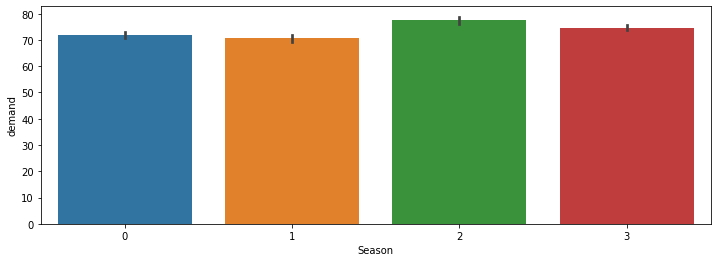

In [25]:
##Creating some Visualisation
#Season vs Demand 

plt.figure(figsize=(12,4))
sns.barplot(x=data['Season'], y=data['demand'])

Graph shows demand was higher during Autumn Season

<AxesSubplot:xlabel='timeOfDay', ylabel='demand'>

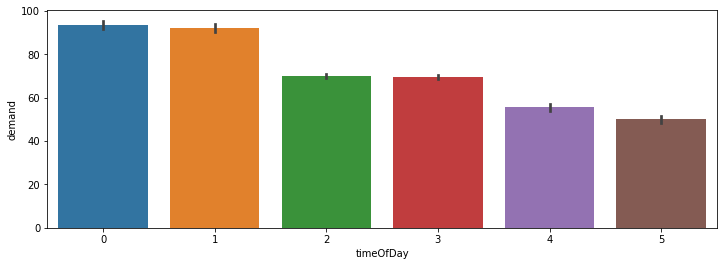

In [26]:
##Time of the day vs Demand

plt.figure(figsize=(12,4))
sns.barplot(x=data['timeOfDay'], y=data['demand'])

Demand was higher during Evening

In [27]:
##Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
X_train,X_test,y_train,y_test = train_test_split(x.values,y,test_size = 0.3, random_state=42)

In [29]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
      'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.
          Neural Network trained.
           Random Forest trained.
Linear Regression(lasso) trained.
       Linear Regression trained.


In [30]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [31]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 37.74
          Neural Network RMSE: 36.10
           Random Forest RMSE: 34.96
Linear Regression(lasso) RMSE: 38.06
       Linear Regression RMSE: 37.74


In [32]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))

Linear Regression(Ridge) R^2: 0.15914
          Neural Network R^2: 0.23065
           Random Forest R^2: 0.27869
Linear Regression(lasso) R^2: 0.14510
       Linear Regression R^2: 0.15914
